In [1]:
import warnings
warnings.filterwarnings('ignore')

from utils import plot_gini, plot_performance, plot_comparison, plot_comparison_time, plot_power, plot_performance_ffn, plot_strategy_selection, plot_kl, plot_tasks, plot_performance_half
from groupBMC.groupBMC import GroupBMC
from torch.distributions import Normal, Bernoulli
import statsmodels.api as sm
import matplotlib as mpl
import pandas as pd
import numpy as np
import torch

torch.set_printoptions(precision=3, sci_mode=False)
np.set_printoptions(suppress=True)

# Model Simulations

## Known Ranking

### BMI

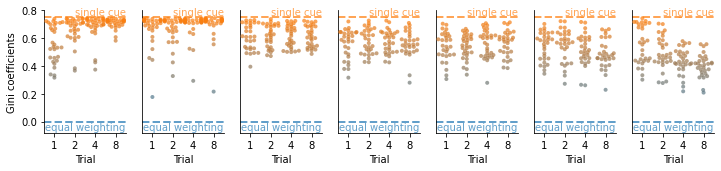

In [2]:
mpl.rcParams['figure.figsize'] = (12, 2.25)

load_path = 'data/bmli_ranking.pth'
map_performance, avg_performance, gini_coefficients = torch.load(load_path)

time_indices = [1, 2, 4, 8]
plot_gini(gini_coefficients, time_indices)

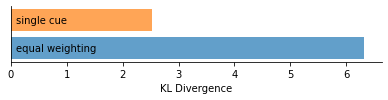

In [3]:
mpl.rcParams['figure.figsize'] = (5.5, 1.5)

kl_divergences = torch.load('data/kl_ranking.pth')[0]

plot_kl(kl_divergences)

### Ideal Observer

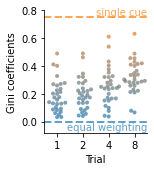

In [4]:
mpl.rcParams['figure.figsize'] = (1.85, 2.25)

load_path = 'data/baselines_ranking.pth'
map_performance, avg_performance, gini_coefficients = torch.load(load_path)
time_indices = [1, 2, 4, 8]
plot_gini(gini_coefficients, time_indices)

## Known Direction

### BMI

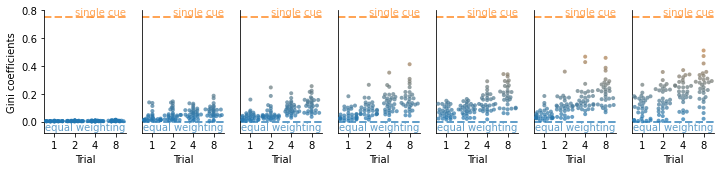

In [5]:
mpl.rcParams['figure.figsize'] = (12, 2.25)

load_path = 'data/bmli_direction.pth'
map_performance, avg_performance, gini_coefficients = torch.load(load_path)

time_indices = [1, 2, 4, 8]
plot_gini(gini_coefficients, time_indices)

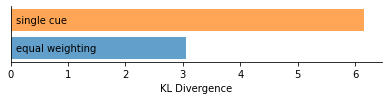

In [6]:
mpl.rcParams['figure.figsize'] = (5.5, 1.5)

kl_divergences = torch.load('data/kl_direction.pth')[0]

plot_kl(kl_divergences)

### Ideal Observer

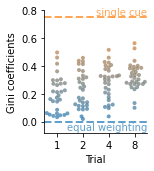

In [7]:
mpl.rcParams['figure.figsize'] = (1.85, 2.25)

load_path = 'data/baselines_direction.pth'
map_performance, avg_performance, gini_coefficients = torch.load(load_path)
time_indices = [1, 2, 4, 8]
plot_gini(gini_coefficients, time_indices)

## Unknown Ranking and Direction 

### BMI

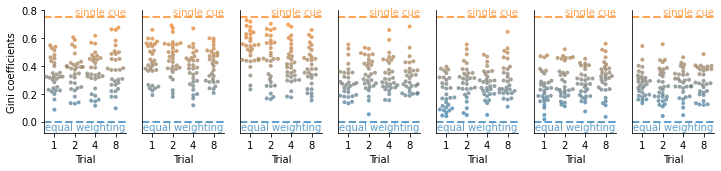

In [8]:
mpl.rcParams['figure.figsize'] = (12, 2.25)

load_path = 'data/bmli_none.pth'
map_performance, avg_performance, gini_coefficients = torch.load(load_path)

time_indices = [1, 2, 4, 8]
plot_gini(gini_coefficients, time_indices)

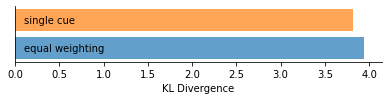

In [9]:
mpl.rcParams['figure.figsize'] = (5.5, 1.5)

kl_divergences = torch.load('data/kl_none.pth')[0]

plot_kl(kl_divergences)

### Ideal Observer

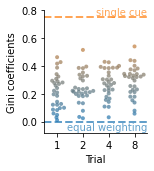

In [10]:
mpl.rcParams['figure.figsize'] = (1.85, 2.25)

load_path = 'data/baselines_none.pth'
map_performance, avg_performance, gini_coefficients = torch.load(load_path)
time_indices = [1, 2, 4, 8]
plot_gini(gini_coefficients, time_indices)

# Experiment 1: Known Ranking

## Performance

Mean accuracy for all participants:
tensor(0.683)
tensor(0.075)


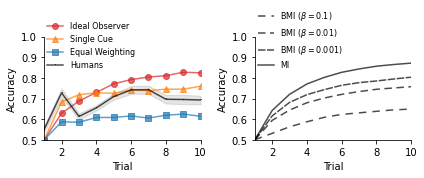

In [11]:
mpl.rcParams['figure.figsize'] = (6.0, 2.5)

inputs_a, inputs_b, targets, predictions, _ = torch.load("data/humans_ranking.pth")
human_correct = (targets == predictions).view(targets.shape[0],targets.shape[1], -1).float()
_, performance_baselines, _ = torch.load("data/baselines_ranking.pth")
_, performance_bmi, _ = torch.load('data/bmli_ranking.pth')

plot_performance(performance_baselines, performance_bmi, human_correct)

## Model Comparison

### without BMI

Number of participants best explained by hypothesis:
tensor(23)
Number of participants better explained than 0.99:
tensor(19)
Joint posterior for each model: tensor([[0., 0., 0., 1., 0., 0.]])


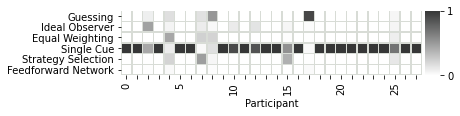

In [12]:
mpl.rcParams['figure.figsize'] = (6.5, 2.5)

logprobs_baselines = torch.load('data/logprobs1_fitted.pth')[0]
logprobs_selection = torch.load('data/logprobs1_selection_fitted.pth')[0]
logprobs_feedforward =  torch.load('data/logprobs1_feedforward_fitted.pth')[0]

plot_comparison(3, logprobs_baselines, logprobs_selection, logprobs_feedforward)

In [13]:
L = torch.load('data/evidence1.pth').t().numpy()
result = GroupBMC(L).get_result()
print('PXP:' + str(result.protected_exceedance_probability))

PXP:[0. 0. 0. 1. 0. 0.]


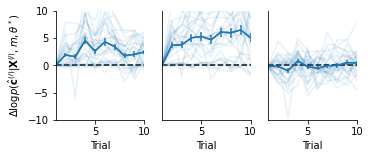

In [14]:
mpl.rcParams['figure.figsize'] = (5.4, 2.0)

logprobs_time = torch.load('data/logprobs1_time.pth')[0]

plot_comparison_time(logprobs_time, model_index=3)

### with BMI

Number of participants best explained by hypothesis:
tensor(12)
Number of participants better explained than 0.99:
tensor(9)
Joint posterior for each model: tensor([[    0.000,     0.000,     0.000,     0.000,     0.000,     0.000,
             1.000]])
Participants best described by BMI have lower resource limitations:
t(15.399032544199585) = -2.7753495249276185, p = 0.006940481469844361


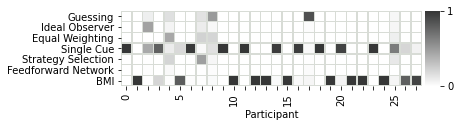

In [15]:
mpl.rcParams['figure.figsize'] = (6.5, 2.5)

logprobs_baselines = torch.load('data/logprobs1_fitted.pth')[0]
logprobs_selection = torch.load('data/logprobs1_selection_fitted.pth')[0]
logprobs_feedforward = torch.load('data/logprobs1_feedforward_fitted.pth')[0]
logprobs_bmi = torch.load('data/logprobs1_bmli.pth')[0]

plot_comparison(6, logprobs_baselines, logprobs_selection, logprobs_feedforward, logprobs_bmi, t_test=True)

# Experiment 2: Known Direction

## Performance

Mean accuracy for all participants:
tensor(0.738)
tensor(0.045)


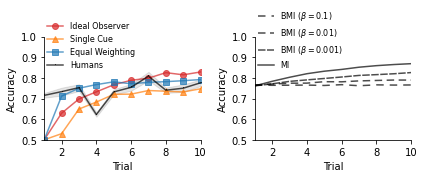

In [16]:
mpl.rcParams['figure.figsize'] = (6.0, 2.5)

inputs_a, inputs_b, targets, predictions, _ = torch.load("data/humans_direction.pth")
human_correct = (targets == predictions).view(targets.shape[0],targets.shape[1], -1).float()
_, performance_baselines, _ = torch.load("data/baselines_direction.pth")
_, performance_bmi, _ = torch.load('data/bmli_direction.pth')

plot_performance(performance_baselines, performance_bmi, human_correct)

## Model Comparison

### without BMI

Number of participants best explained by hypothesis:
tensor(24)
Number of participants better explained than 0.99:
tensor(24)
Joint posterior for each model: tensor([[0., 0., 1., 0., 0., 0.]])


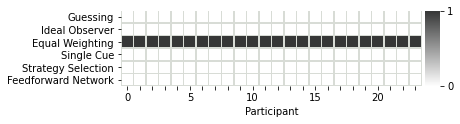

In [17]:
mpl.rcParams['figure.figsize'] = (6.5, 2.5)

logprobs_baselines = torch.load('data/logprobs2_fitted.pth')[0]
logprobs_selection = torch.load('data/logprobs2_selection_fitted.pth')[0]
logprobs_feedforward =  torch.load('data/logprobs2_feedforward_fitted.pth')[0]

plot_comparison(2, logprobs_baselines, logprobs_selection, logprobs_feedforward)

In [18]:
L = torch.load('data/evidence2.pth').t().numpy()
result = GroupBMC(L).get_result()
print('PXP:' + str(result.protected_exceedance_probability))

PXP:[0.         0.         0.99999999 0.         0.         0.        ]


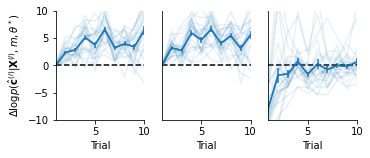

In [19]:
mpl.rcParams['figure.figsize'] = (5.4, 2.0)

logprobs_time = torch.load('data/logprobs2_time.pth')[0]

plot_comparison_time(logprobs_time, model_index=2)

### with BMI

Number of participants best explained by hypothesis:
tensor(20)
Number of participants better explained than 0.99:
tensor(18)
Joint posterior for each model: tensor([[0., 0., 0., 0., 0., 0., 1.]])


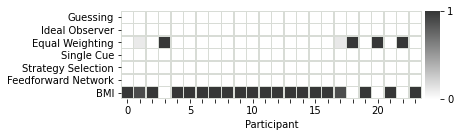

In [20]:
mpl.rcParams['figure.figsize'] = (6.5, 2.5)

logprobs_baselines = torch.load('data/logprobs2_fitted.pth')[0]
logprobs_selection = torch.load('data/logprobs2_selection_fitted.pth')[0]
logprobs_feedforward = torch.load('data/logprobs2_feedforward_fitted.pth')[0]
logprobs_bmi = torch.load('data/logprobs2_bmli.pth')[0]

plot_comparison(6, logprobs_baselines, logprobs_selection, logprobs_feedforward, logprobs_bmi)

# Experiment 3: Unknown Ranking and Direction -- 2 Features

## Performance

Mean accuracy for all participants:
tensor(0.716)
tensor(0.057)


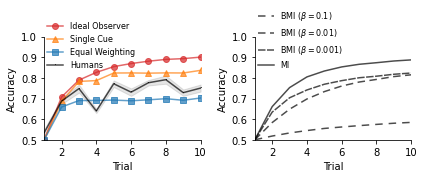

In [21]:
mpl.rcParams['figure.figsize'] = (6.0, 2.5)

inputs_a, inputs_b, targets, predictions, _, weights, direction1, direction2, ranking = torch.load("data/humans_2features.pth")
human_correct = (targets == predictions).view(targets.shape[0],targets.shape[1], -1).float()
_, performance_baselines, _ = torch.load("data/baselines_none_2cues.pth")
_, performance_bmi, _ = torch.load('data/bmli_none_2cues.pth')

plot_performance(performance_baselines, performance_bmi, human_correct)

## Model Comparison

### with BMI

Number of participants best explained by hypothesis:
tensor(22)
Number of participants better explained than 0.99:
tensor(16)
Joint posterior for each model: tensor([[0., 0., 0., 0., 0., 0., 1.]])


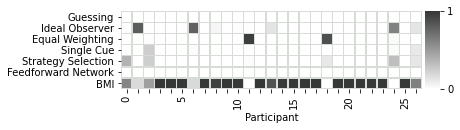

In [22]:
mpl.rcParams['figure.figsize'] = (6.5, 2.5)

logprobs_baselines = torch.load('data/logprobs4_fitted.pth')[0]
logprobs_selection = torch.load('data/logprobs4_selection_fitted.pth')[0]
logprobs_feedforward = torch.load('data/logprobs4_feedforward_fitted.pth')[0]
logprobs_bmi = torch.load('data/logprobs4_bmli.pth')[0]

plot_comparison(6, logprobs_baselines, logprobs_selection, logprobs_feedforward, logprobs_bmi)

In [23]:
L = torch.load('data/evidence4.pth').t().numpy()
result = GroupBMC(L).get_result()
print('PXP:' + str(result.protected_exceedance_probability))

PXP:[0.         0.00000019 0.00000127 0.         0.         0.
 0.99999853]


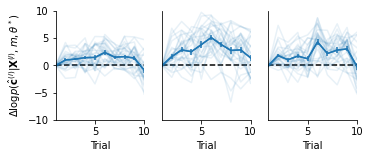

In [24]:
mpl.rcParams['figure.figsize'] = (5.4, 2.0)

logprobs_time = torch.load('data/logprobs4_time.pth')[0]

plot_comparison_time(logprobs_time, model_index=4)

## Judgements about Ranking and Direction

In [25]:
actual_ranking, actual_direction1, actual_direction2, participant_ranking, participant_direction1, participant_direction2, io_ranking, io_direction1, io_direction2, io_mean, io_std, bmi_ranking, bmi_direction1, bmi_direction2, bmi_mean, bmi_std = torch.load('data/judgements.pth')

bmi_mean_difference = bmi_mean[:, :, :, 0] - bmi_mean[:, :, :, 1]
bmi_std_difference = (bmi_std[:, :, :, 0].pow(2) + bmi_std[:, :, :, 1].pow(2)).sqrt()

samples = Normal(bmi_mean, bmi_std).sample((10000,)).abs()
bmi_rank = Bernoulli((samples[:, :, :, :, 0] < samples[:, :, :, :, 1]).float().mean(0).mean(2)).log_prob(participant_ranking).sum()
bmi_dir1 = Bernoulli(Normal(torch.zeros([]), torch.ones([])).cdf((bmi_mean[:, :, :, 0] / bmi_std[:, :, :, 0]).mean(-1, keepdim=True))).log_prob(participant_direction1.unsqueeze(-1)).sum()
bmi_dir2 = Bernoulli(Normal(torch.zeros([]), torch.ones([])).cdf((bmi_mean[:, :, :, 1] / bmi_std[:, :, :, 1]).mean(-1, keepdim=True))).log_prob(participant_direction2.unsqueeze(-1)).sum()
bmi_dir = bmi_dir1 + bmi_dir2

samples = Normal(io_mean, io_std).sample((10000,)).abs()
io_rank = Bernoulli((samples[:, :, :, 0] < samples[:, :, :, 1]).float().mean(0)).log_prob(participant_ranking).sum()
io_dir1 = Bernoulli(Normal(torch.zeros([]), torch.ones([])).cdf(io_mean[:, :, 0] / io_std[:, :, 0])).log_prob(participant_direction1).sum()
io_dir2 = Bernoulli(Normal(torch.zeros([]), torch.ones([])).cdf(io_mean[:, :, 1] / io_std[:, :, 1])).log_prob(participant_direction2).sum()
io_dir = io_dir1 + io_dir2

print('BF Ranking:')
print(torch.exp(bmi_rank - io_rank).item())

print('BF Direction:')
print(torch.exp(bmi_dir - io_dir).item())

BF Ranking:
0.41795751452445984
BF Direction:
1.4047881600425065e+24


# Experiment 3b: Unknown Ranking and Direction -- 4 Features

## Performance

Mean accuracy for all participants:
tensor(0.571)
tensor(0.044)


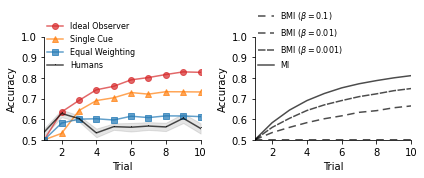

In [26]:
mpl.rcParams['figure.figsize'] = (6.0, 2.5)

inputs_a, inputs_b, targets, predictions, _ = torch.load("data/humans_none.pth")
human_correct = (targets == predictions).view(targets.shape[0],targets.shape[1], -1).float()
_, performance_baselines, _ = torch.load("data/baselines_none.pth")
_, performance_bmi, _ = torch.load('data/bmli_none.pth')

plot_performance(performance_baselines, performance_bmi, human_correct)

## Model Comparison

Number of participants best explained by hypothesis:
tensor(9)
Number of participants better explained than 0.99:
tensor(4)
Joint posterior for each model: tensor([[    0.000,     0.000,     0.000,     0.000,     0.000,     0.000,
             1.000]])


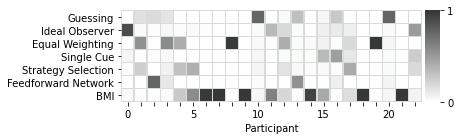

In [27]:
mpl.rcParams['figure.figsize'] = (6.5, 2.5)

logprobs_baselines = torch.load('data/logprobs3_fitted.pth')[0]
logprobs_selection = torch.load('data/logprobs3_selection_fitted.pth')[0]
logprobs_feedforward = torch.load('data/logprobs3_feedforward_fitted.pth')[0]
logprobs_bmi = torch.load('data/logprobs3_bmli.pth')[0]

plot_comparison(6, logprobs_baselines, logprobs_selection, logprobs_feedforward, logprobs_bmi)

In [28]:
L = torch.load('data/evidence3.pth').t().numpy()
result = GroupBMC(L).get_result()
print('PXP:' + str(result.protected_exceedance_probability))

PXP:[0.07815507 0.0682721  0.08278973 0.068062   0.068062   0.06806201
 0.5665971 ]


# General Discussion

## Figure 13: Meta-Learning happend before the experiment

### Experiment 1

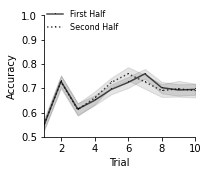

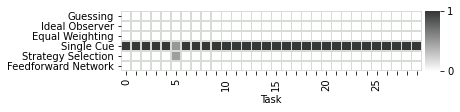

In [29]:
mpl.rcParams['figure.figsize'] = (3.0, 2.5)

_, _, targets, predictions, _ = torch.load("data/humans_ranking.pth")
plot_performance_half(targets, predictions)

mpl.rcParams['figure.figsize'] = (6.5, 2.5)

baselines_logprob = torch.load('data/logprobs1_tasks_fitted.pth')[0]
selection_logprob = torch.load('data/logprobs1_tasks_selection_fitted.pth')[0]
feedforward_logprob = torch.load('data/logprobs1_tasks_feedforward_fitted.pth')[0]
plot_tasks(baselines_logprob, selection_logprob, feedforward_logprob)

### Experiment 2

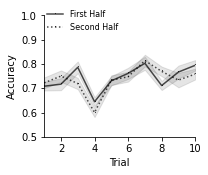

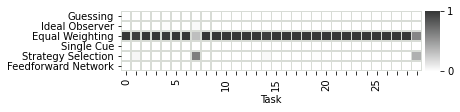

In [30]:
mpl.rcParams['figure.figsize'] = (3.0, 2.5)

_, _, targets, predictions, _ = torch.load("data/humans_direction.pth")
plot_performance_half(targets, predictions)

mpl.rcParams['figure.figsize'] = (6.5, 2.5)

baselines_logprob = torch.load('data/logprobs2_tasks_fitted.pth')[0]
selection_logprob = torch.load('data/logprobs2_tasks_selection_fitted.pth')[0]
feedforward_logprob = torch.load('data/logprobs2_tasks_feedforward_fitted.pth')[0]
plot_tasks(baselines_logprob, selection_logprob, feedforward_logprob)

# Appendix

## Power Analysis

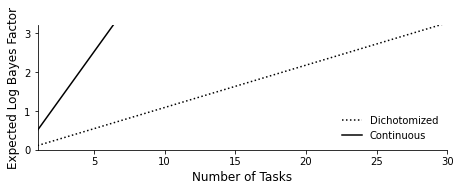

In [31]:
# load and ln to log10
kl = torch.load('data/power_analysis.pth').div(2.303) 
plot_power(kl)

## Strategy Selection Model

### Experiment 1: Known Ranking

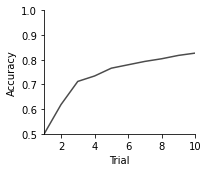

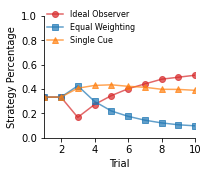

In [32]:
mpl.rcParams['figure.figsize'] = (3.0, 2.5)

_, performance, selected_models = torch.load("data/additional_baselines_ranking.pth")

plot_strategy_selection(performance, selected_models)

### Experiment 2: Known Direction

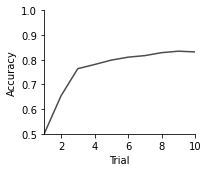

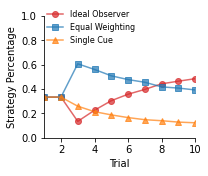

In [33]:
mpl.rcParams['figure.figsize'] = (3.0, 2.5)

_, performance, selected_models = torch.load("data/additional_baselines_direction.pth")

plot_strategy_selection(performance, selected_models)

### Experiment 3: Unknown Ranking and Direction -- 2 Features

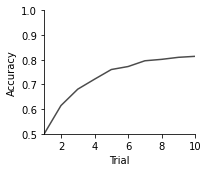

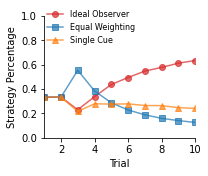

In [34]:
mpl.rcParams['figure.figsize'] = (3.0, 2.5)

_, performance, selected_models = torch.load("data/additional_baselines_none_2features.pth")

plot_strategy_selection(performance, selected_models)

## Feedforward Network

### Experiment 1: Known Ranking

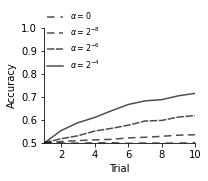

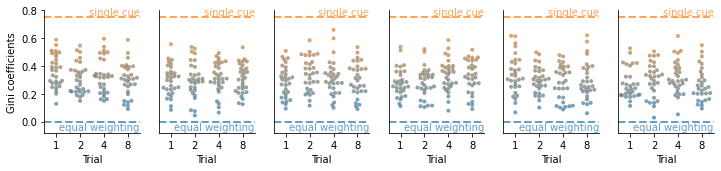

In [35]:
load_path = 'data/feedforward_baselines_ranking.pth'
map_performance, avg_performance, gini_coefficients = torch.load(load_path)

mpl.rcParams['figure.figsize'] = (3.0, 2.5)
plot_performance_ffn(avg_performance)

mpl.rcParams['figure.figsize'] = (12, 2.25)
time_indices = [1, 2, 4, 8]
plot_gini(gini_coefficients, time_indices)

### Experiment 2: Known Direction

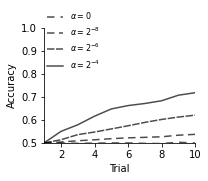

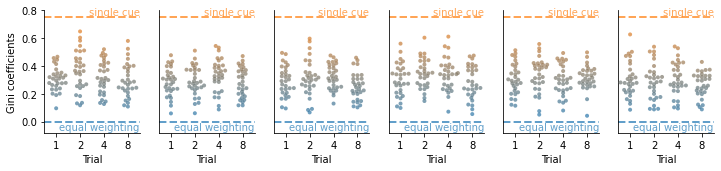

In [36]:
load_path = 'data/feedforward_baselines_direction.pth'
map_performance, avg_performance, gini_coefficients = torch.load(load_path)

mpl.rcParams['figure.figsize'] = (3.0, 2.5)
plot_performance_ffn(avg_performance)

mpl.rcParams['figure.figsize'] = (12, 2.25)
time_indices = [1, 2, 4, 8]
plot_gini(gini_coefficients, time_indices)

### Experiment 3: Unknown Ranking and Direction -- 2 Features

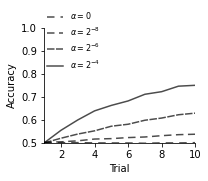

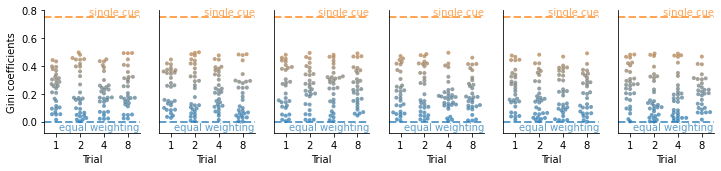

In [37]:
load_path = 'data/feedforward_baselines_none_2features.pth'
map_performance, avg_performance, gini_coefficients = torch.load(load_path)

mpl.rcParams['figure.figsize'] = (3.0, 2.5)
plot_performance_ffn(avg_performance)

mpl.rcParams['figure.figsize'] = (12, 2.25)
time_indices = [1, 2, 4, 8]
plot_gini(gini_coefficients, time_indices)